# 1.0 IMPORT NECESSARY LIBRARIES
In this section, we will load important libraries to help manipulating data and to perform data visualization

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


#resampling library
from imblearn.over_sampling import SMOTE

#feature scaling library
from sklearn.preprocessing import StandardScaler

#libtune to tune model, get different metric score
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
%matplotlib inline

# 2.0 DATA LOADING AND OVERVIEW
In this section, we will load important libraries to help manipulating data and to perform data visualization

In [2]:
df = pd.read_csv("data.csv")

In [3]:
##shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 11914 rows and 16 columns.


In [4]:
#print first five rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
#Check the info of the data set which describes null values, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 3.0 DATA PREPROCESSING
In this section, we will load important libraries to help manipulating data and to perform data visualization

### 3.1 Data Cleaning

In [7]:
#missing data
df.isnull().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
# Handle the value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
# Handling missing values
df['Market Category'] = df['Market Category'].fillna(df['Market Category'].mode()[0])
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

In [10]:
# Calculate the mean
mean_val1 = df['Engine HP'].mean()
mean_val2 = df['Engine Cylinders'].mean()
mean_val3 = df['Number of Doors'].mean()

# Replace NaN values with the mean
df['Engine HP'].fillna(mean_val1, inplace=True)
df['Engine Cylinders'].fillna(mean_val2, inplace=True)
df['Number of Doors'].fillna(mean_val2, inplace=True)

In [11]:
# Display sum of missing value
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

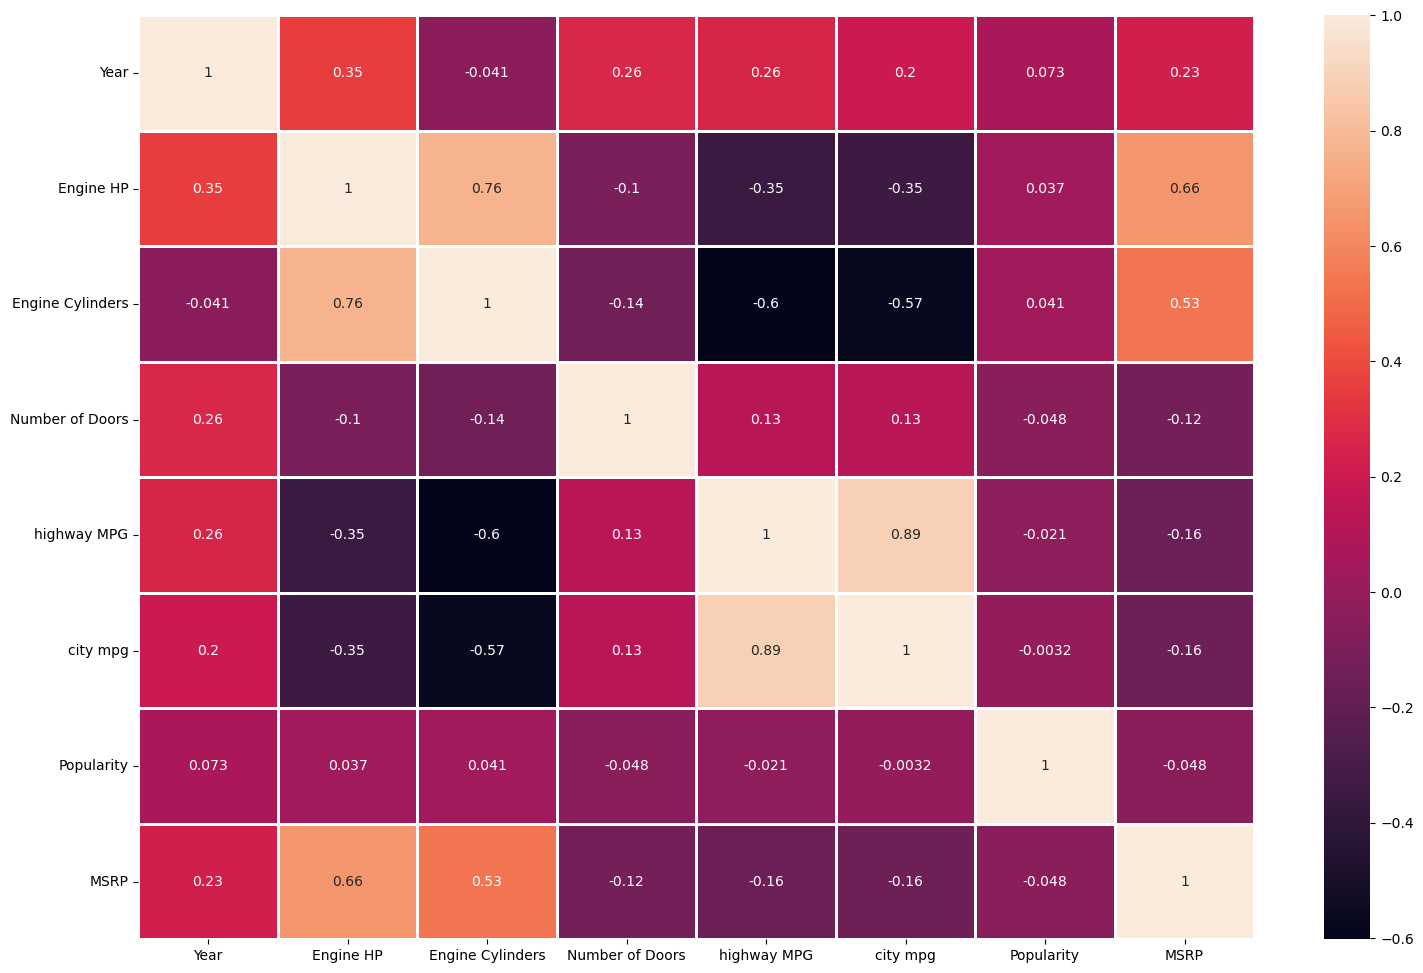

In [12]:
# Plot a heatmap 
# To show relationships between two variables

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [13]:
# Display the shape of data
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


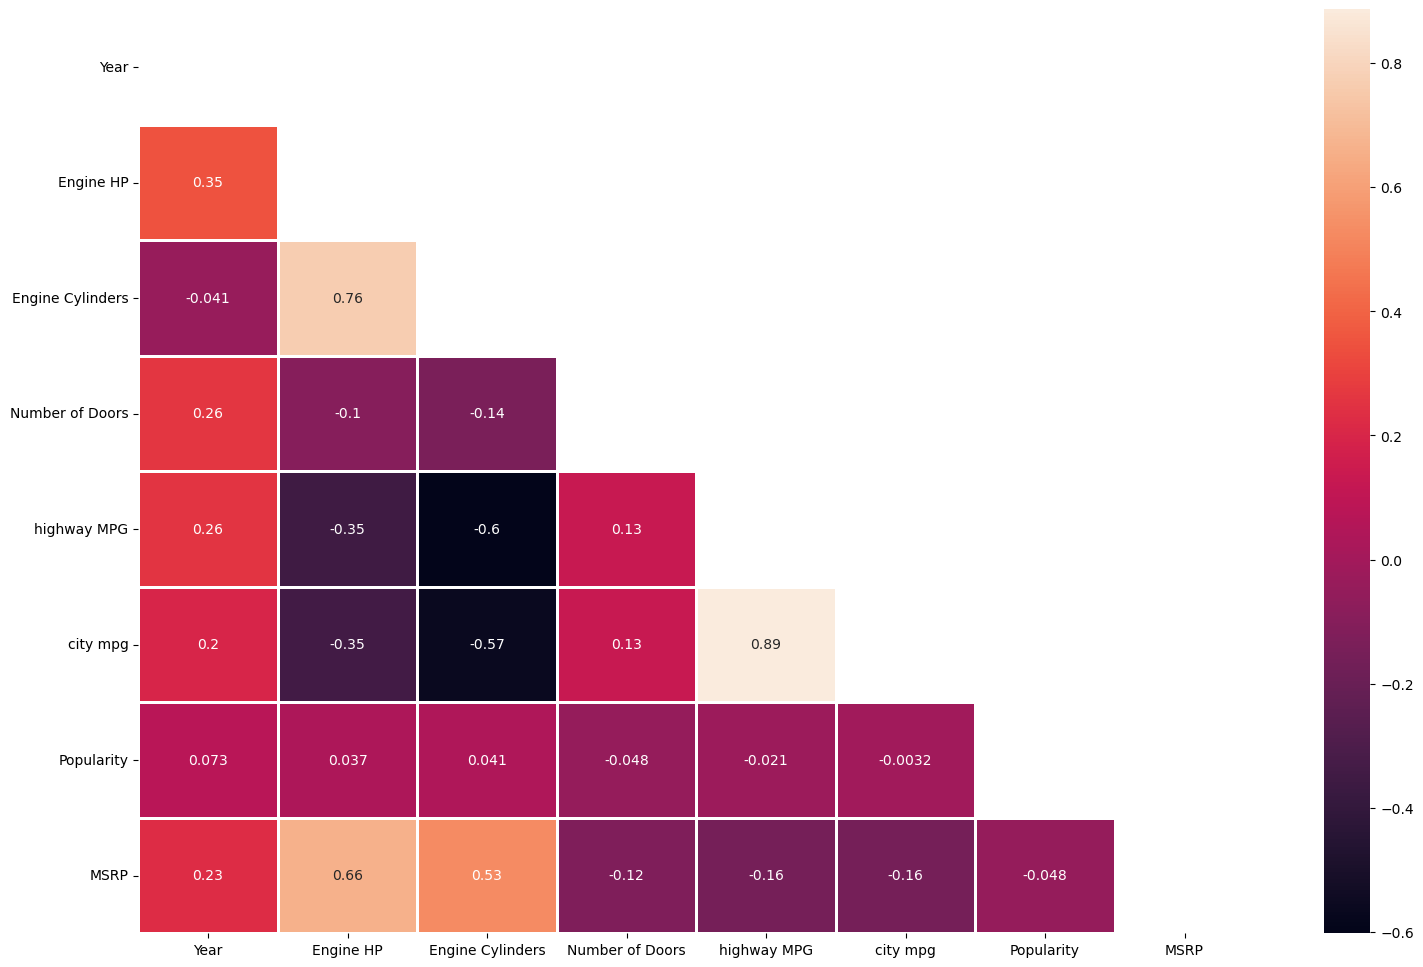

In [14]:
# If several independent variables in a model are correlated.
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [15]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
# Separate the feature and target columns
# To compare the data
X = df.drop('MSRP', axis = 1)
y = df['MSRP']

In [17]:
# Split columns into data types numerical and object (categorical)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

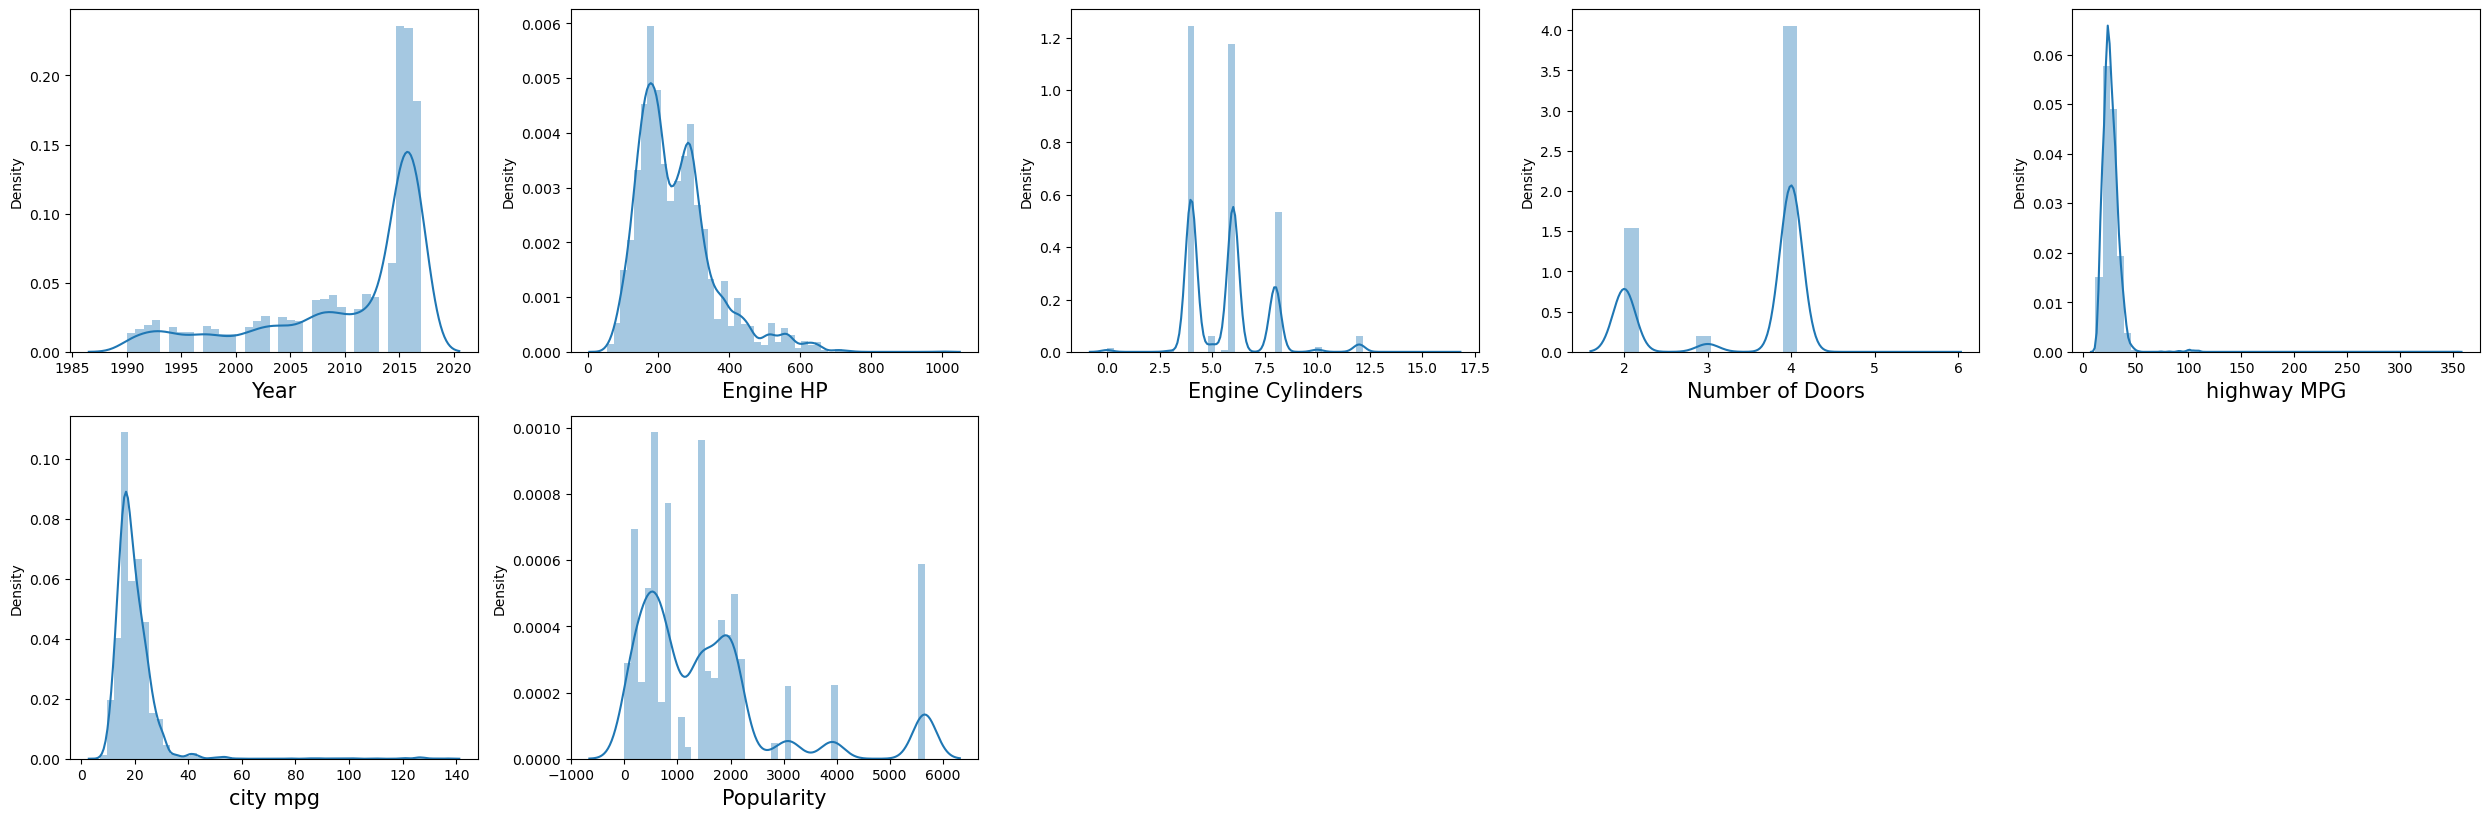

In [18]:
# PLot visualization for the selected variable
# To show trends over time
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

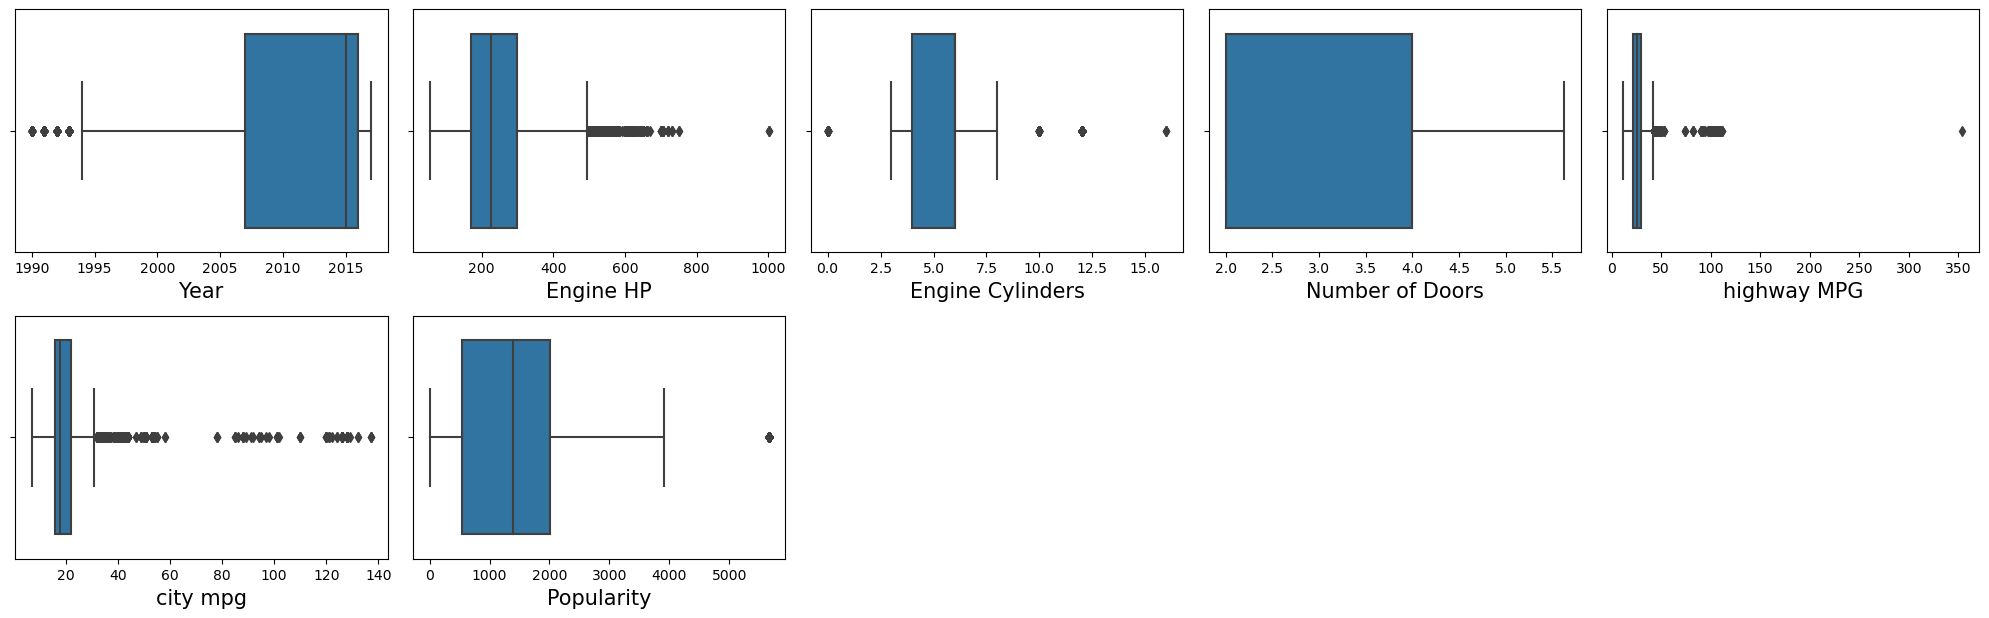

In [19]:
# Plot boxplot for the variables
# To identify outliers
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [20]:
# Perform data pre-processing by importing standardscaler
# To standardize and normalize numerical input variables for classification
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)
    
    return df

In [21]:
# Encode categorical data into numbers
# To evaluate the model
X = scale_and_encode(X)
X.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0.081228,0.786382,0.208729,-1.628684,-0.071930,-0.081587,1.637604,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.081228,0.464900,0.208729,-1.628684,0.153737,-0.081587,1.637604,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.081228,0.464900,0.208729,-1.628684,0.153737,0.029680,1.637604,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.081228,-0.178065,0.208729,-1.628684,0.153737,-0.192853,1.637604,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.081228,-0.178065,0.208729,-1.628684,0.153737,-0.192853,1.637604,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# Display the original dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance     

In [23]:
# Sort the dataset based on MSRP in descending order
sorted_data = df.sort_values('MSRP', ascending=False)

print("\nSorted Dataset (based on MSRP):")
print(sorted_data.head())


Sorted Dataset (based on MSRP):
              Make        Model  Year             Engine Fuel Type  Engine HP  \
11362      Bugatti  Veyron 16.4  2008  premium unleaded (required)     1001.0   
11364      Bugatti  Veyron 16.4  2009  premium unleaded (required)     1001.0   
8486   Lamborghini     Reventon  2008  premium unleaded (required)      650.0   
11363      Bugatti  Veyron 16.4  2008  premium unleaded (required)     1001.0   
6351       Maybach    Landaulet  2012  premium unleaded (required)      620.0   

       Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
11362              16.0  AUTOMATED_MANUAL   all wheel drive              2.0   
11364              16.0  AUTOMATED_MANUAL   all wheel drive              2.0   
8486               12.0  AUTOMATED_MANUAL   all wheel drive              2.0   
11363              16.0  AUTOMATED_MANUAL   all wheel drive              2.0   
6351               12.0         AUTOMATIC  rear wheel drive              4.0   


# 3.0 DATA RESHAPING
In this section, we will load important libraries to help manipulating data and to perform data visualization

In [24]:
# Group the dataset by Make and calculate the average HighwayMPG
# Calculate the average HighwayMPG and CityMPG by Make
average_mpg_by_make = df.groupby('Make').agg({'highway MPG': 'mean', 'city mpg': 'mean'}).reset_index()
average_mpg_by_make['CombinedMPG'] = average_mpg_by_make['highway MPG'] + average_mpg_by_make['city mpg']

# Print the results
print("\nAverage MPG by Make:")
print(average_mpg_by_make)



Average MPG by Make:
             Make  highway MPG   city mpg  CombinedMPG
0           Acura    28.111111  19.940476    48.051587
1      Alfa Romeo    34.000000  24.000000    58.000000
2    Aston Martin    18.892473  12.526882    31.419355
3            Audi    28.823171  19.585366    48.408537
4             BMW    29.245509  20.739521    49.985030
5         Bentley    18.905405  11.554054    30.459459
6         Bugatti    14.000000   8.000000    22.000000
7           Buick    26.948980  18.704082    45.653061
8        Cadillac    25.236776  17.355164    42.591940
9       Chevrolet    25.815672  19.021371    44.837044
10       Chrysler    26.368984  17.759358    44.128342
11          Dodge    22.345048  16.065495    38.410543
12           FIAT    37.338710  30.645161    67.983871
13        Ferrari    15.724638  10.565217    26.289855
14           Ford    24.006810  17.960272    41.967083
15            GMC    21.403883  15.813592    37.217476
16        Genesis    25.333333  16.333333  

# 4.0 DATA MODELLING (LINEAR REGRESSION)

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create a linear regression model
regressor = LinearRegression()

In [34]:
# Train the model on the training data
model.fit(X_train, y_train)
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)
print(y_pred)

[30625.125  25697.625  37577.125  ... 21967.125  24070.125  57771.9375]


In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.12543104843019e+28
R-squared: -8.917007125638744e+18


# 5.0 DATA MODELLING (DECISION TREE)

In [65]:
# Build the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [67]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 422406459.06882083
R-squared: 0.8227841167458969


In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.13932018464120857


In [46]:
# Generate the classification report
#report = classification_report(y_test, y_pred)
#print("Classification Report:")
#print(report)

Classification Report:
              precision    recall  f1-score   support

        2000       0.95      0.97      0.96       216
        2003       0.00      0.00      0.00         0
        2019       0.00      0.00      0.00         1
        2033       0.00      0.00      0.00         1
        2042       0.00      0.00      0.00         0
        2044       0.00      0.00      0.00         1
        2046       0.00      0.00      0.00         0
        2048       0.00      0.00      0.00         1
        2055       0.00      0.00      0.00         0
        2064       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2074       0.00      0.00      0.00         1
        2078       0.00      0.00      0.00         2
        2081       0.00      0.00      0.00         1
        2084       0.00      0.00      0.00         1
        2088       0.00      0.00      0.00         1
        2103       0.00      0.00      0.00         0
    

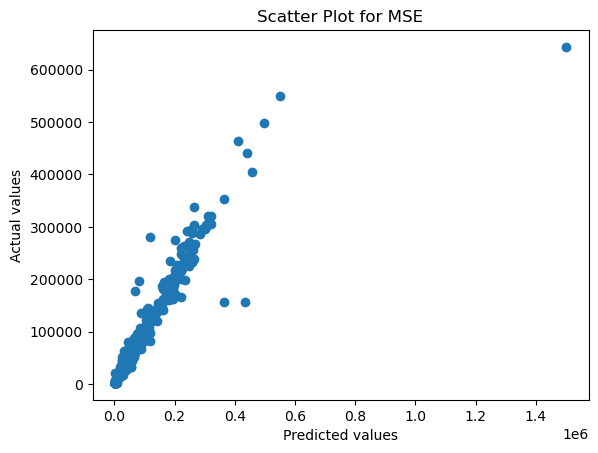

In [69]:
# Plot the scatter plot for MSE
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter Plot for MSE")
plt.show()

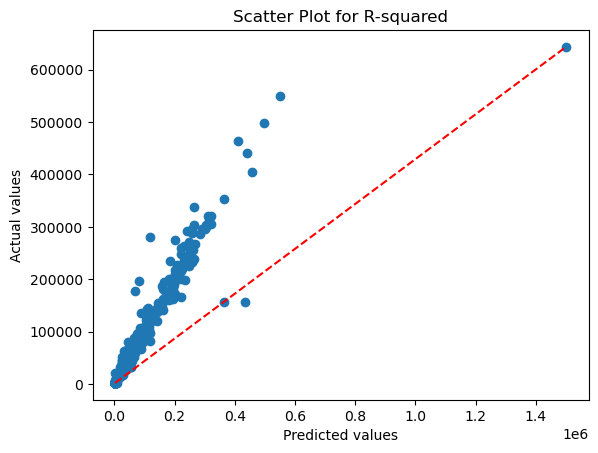

In [70]:
# Plot the scatter plot for R-squared
plt.scatter(y_pred, y_test)
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter Plot for R-squared")
plt.show()

# RANDOM FOREST

In [55]:
# Build the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [57]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 144588928.42215696
R-squared: 0.939339339849152


In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1355434326479228


In [59]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        2000       0.91      0.98      0.95       216
        2003       0.00      0.00      0.00         0
        2019       0.00      0.00      0.00         1
        2033       0.00      0.00      0.00         1
        2042       0.00      0.00      0.00         0
        2044       0.00      0.00      0.00         1
        2046       0.00      0.00      0.00         0
        2048       0.00      0.00      0.00         1
        2055       0.00      0.00      0.00         0
        2063       0.00      0.00      0.00         0
        2064       0.00      0.00      0.00         1
        2073       0.00      0.00      0.00         1
        2074       0.00      0.00      0.00         1
        2078       0.00      0.00      0.00         2
        2081       0.00      0.00      0.00         1
        2084       0.00      0.00      0.00         1
        2088       0.00      0.00      0.00         1
    

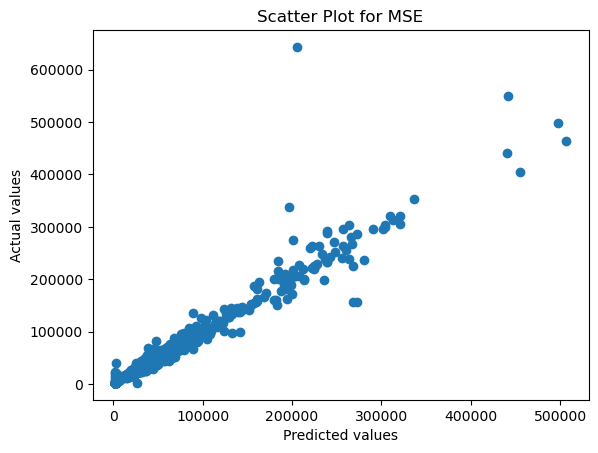

In [60]:
# Plot the scatter plot for MSE
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter Plot for MSE")
plt.show()

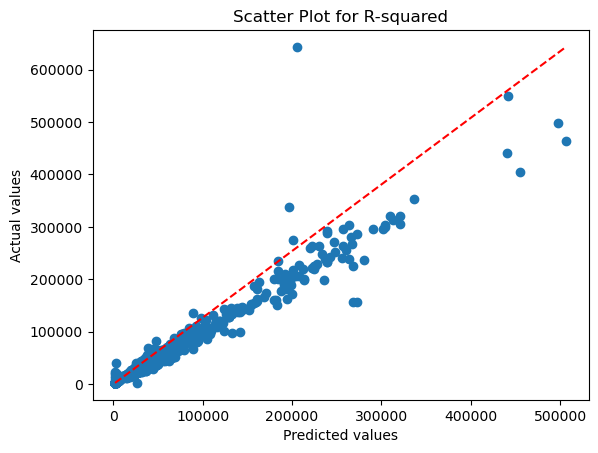

In [61]:
# Plot the scatter plot for R-squared
plt.scatter(y_pred, y_test)
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter Plot for R-squared")
plt.show()